# Import libraries

In [21]:
import os, sys
import pandas as pd
import numpy as np
import cv2

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
sb.set() 

from sklearn.model_selection import train_test_split

# Import data

In [2]:
path = r"C:\Users\vigne\Documents\NTUsem1\AI6121 Computer Vision\Project\age_gender_folder\age_gender.csv"

In [3]:
# import data
df = pd.read_csv(path)
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
df1 = df.copy()

In [5]:
df1['age'].unique()

array([  1,  10, 100, 101, 103, 105,  11, 110, 111, 115, 116,  12,  13,
        14,  15,  16,  17,  18,  19,   2,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,   3,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,   4,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         5,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,   6,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,   7,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,   8,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,   9,  90,  91,  92,  93,  95,  96,  99],
      dtype=int64)

# Data exploration

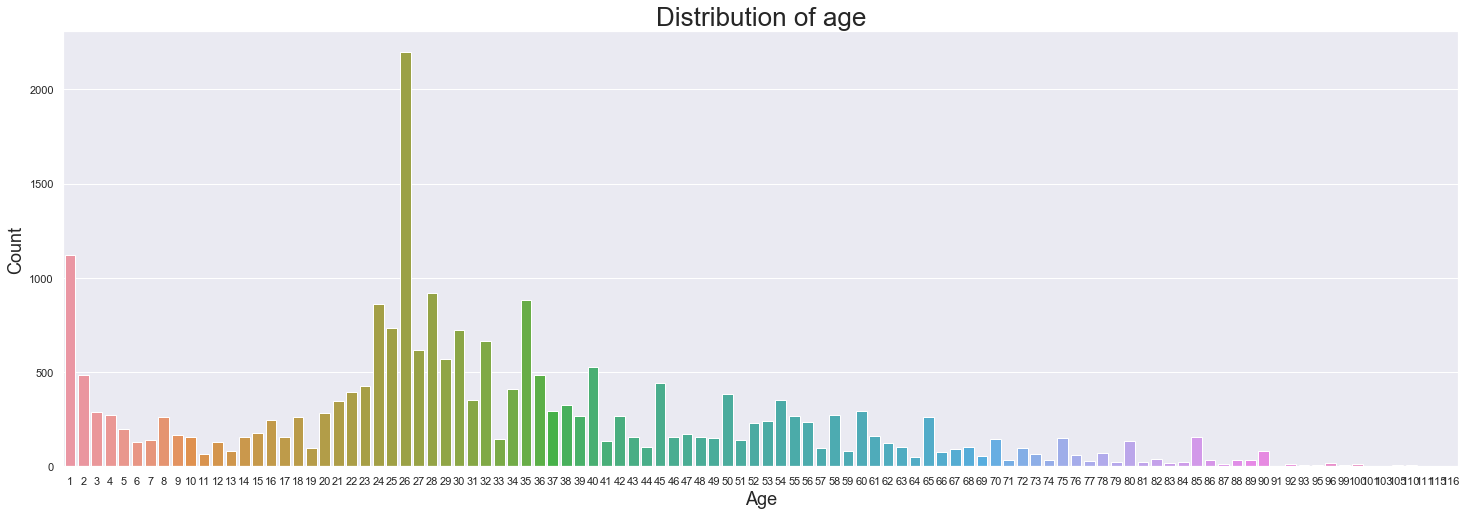

In [22]:
# Plot distribution of age
fig, ax = plt.subplots(figsize=(25,8))
sb.countplot(ax=ax, x="age", data=df1)
plt.title("Distribution of age", fontsize=26)
ax.set_xlabel("Age", fontsize=18)
ax.set_ylabel("Count", fontsize=18)
plt.show()

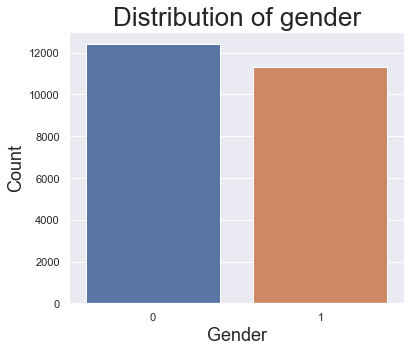

In [23]:
# Plot distribution of gender
fig, ax = plt.subplots(figsize=(6,5))
sb.countplot(ax=ax, x="gender", data=df1)
plt.title("Distribution of gender", fontsize=26)
ax.set_xlabel("Gender", fontsize=18)
ax.set_ylabel("Count", fontsize=18)
plt.show()

# Group age range and gender to form new label

In [6]:
def groupAgeRangeAndGender(df1):
    '''
# 16 classes
# MALE = 0
# 0: (0 – 2)
# 1: (4 – 6)
# 2: (8 – 12)
# 3: (15 – 20)
# 4: (25 – 32)
# 5: (38 – 43) 
# 6: (48 – 53) 
# 7: (60 – 100)

# FEMALE = 1
# 0: (0 – 2)
# 1: (4 – 6)
# 2: (8 – 12)
# 3: (15 – 20)
# 4: (25 – 32)
# 5: (38 – 43) 
# 6: (48 – 53) 
# 7: (60 – 100)
    
    '''
    class_list  = np.empty(df1.shape[0])
    for i in range(df1.shape[0]):
        age = df1.loc[i,'age'].item()
        gender = df1.loc[i,'gender'].item()
        if gender:
                if 0<=age<=2:
                    cls=0
                elif 4<=age<=6:
                    cls=1
                elif 8<=age<=12:
                    cls=2
                elif 15<=age<=20:
                    cls=3
                elif 25<=age<=32:
                    cls=4
                elif 38<=age<=43:
                    cls=5
                elif 48<=age<=53:
                    cls=6
                elif 60<=age<=100:
                    cls=7
                else:
                    cls=-1
                
        else:
                if 0<=age<=2:
                    cls=8
                elif 4<=age<=6:
                    cls=9
                elif 8<=age<=12:
                    cls=10
                elif 15<=age<=20:
                    cls=11
                elif 25<=age<=32:
                    cls=12
                elif 38<=age<=43:
                    cls=13
                elif 48<=age<=53:
                    cls=14
                elif 60<=age<=100:
                    cls=15
                else:
                    cls=-1
                    
        class_list[i]=cls
    return class_list
        
        

In [7]:
# Group age and gender into a new class
class_list = groupAgeRangeAndGender(df1)

In [8]:
# Insert the new column in dataframe
df1['Class'] = class_list

In [9]:
df1.head()

,age,ethnicity,gender,img_name,pixels,Class
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,8.0
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,8.0
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,8.0
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...,8.0
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...,8.0


In [10]:
# Remove images that have undesired age
df_data = df1[df1['Class']>-1]

In [11]:
# New data size after removal of undesired images
df_data.shape

(16614, 6)

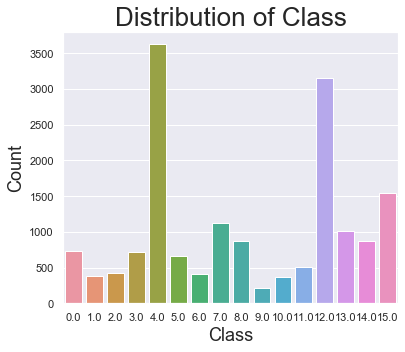

In [24]:
# Plot distribution of class
fig, ax = plt.subplots(figsize=(6,5))
sb.countplot(ax=ax, x="Class", data=df_data)
plt.title("Distribution of Class", fontsize=26)
ax.set_xlabel("Class", fontsize=18)
ax.set_ylabel("Count", fontsize=18)
plt.show()

# Transform list of img data to numpy array for each image

In [12]:
df_data['pixels'] = df_data['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float64).reshape(48, 48)).copy()

C:\Users\vigne\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
# Reset index after removing undesired images
df_data.reset_index(inplace=True)

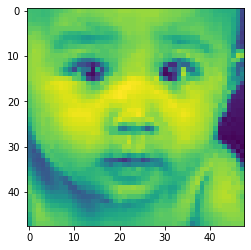

In [14]:
# Sample of first image to ensure image data is not corrupted by the transformation
plt.imshow(df_data['pixels'][0])

In [15]:
# Normalize img data
df_data['pixels'] = df_data['pixels'].apply(lambda x: x/255).copy()

C:\Users\vigne\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Split train validation set

In [16]:
x = np.array(df_data['pixels'].tolist())

# Converting img size to 4D
x = x.reshape(x.shape[0],1,48,48)

# Resize to standard image size using INTER_LINEAR for interpolation
# VGG16 = 224
        face_resized = cv2.resize(face, (size, size), interpolation = cv2.INTER_LINEAR)

In [17]:
y = df_data['Class'].values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=0)

In [18]:
# Print training size
print('x_train: {} , y_train: {}'.format(x_train.shape,y_train.shape))

x_train: (14952, 1, 48, 48) , y_train: (14952,)


In [19]:
# Print validation size
print('x_val: {} , y_val: {}'.format(x_val.shape,y_val.shape))

x_val: (1662, 1, 48, 48) , y_val: (1662,)


# Save test validation data into folder

In [20]:
# Save test validation data into folder
np.save(r"C:\Users\vigne\Documents\NTUsem1\AI6121 Computer Vision\Project\age_gender_folder\x_train.npy", x_train)
np.save(r"C:\Users\vigne\Documents\NTUsem1\AI6121 Computer Vision\Project\age_gender_folder\y_train.npy", y_train)
np.save(r"C:\Users\vigne\Documents\NTUsem1\AI6121 Computer Vision\Project\age_gender_folder\x_val.npy", x_val)
np.save(r"C:\Users\vigne\Documents\NTUsem1\AI6121 Computer Vision\Project\age_gender_folder\y_val.npy", y_val)